In [1]:
# import mkf_internal
# from filterpy.stats import plot_covariance_ellipse

# # joint probability density function
# mkf_internal.plot_3d_covariance(mean1, cov1)

# mkf_internal.plot_3d_sampled_covariance(mean1, cov1)

# def plot2dcov2(mean, cov, k, points = 30):
#     plot_covariance_ellipse(mean, cov, fc='b', alpha=0.2, 
#                             #std=[1, 2, 3],
#                             std=[*k],
#                             title='plot2Dcov')
#     plt.gca().grid(b=False);
#     return

# mean1 = np.array([0,0])
# cov1 = np.array([[1,0],[0,2]])

# plot2dcov2(mean1, cov1, k = [1, 2, 3])

In [2]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

from numpy import linalg as LA
from scipy.linalg import cholesky

init_notebook_mode(connected=True)

sns.set(style='ticks', palette='Set2')

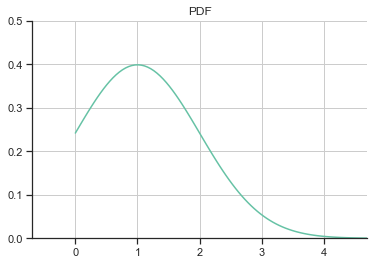

In [3]:
mu = 1
var = 1
sigma = np.sqrt(var)
x = np.linspace(0, mu + 4*sigma, 100)

prior = norm.pdf(x,mu,sigma) # prior

fig, ax = plt.subplots()
ax.plot(x, prior)
ax.set_title('PDF')
ax.set(xlim=[0, 4], ylim=[0, 0.5], aspect=7, adjustable='datalim')
plt.legend()
plt.grid()
sns.despine()

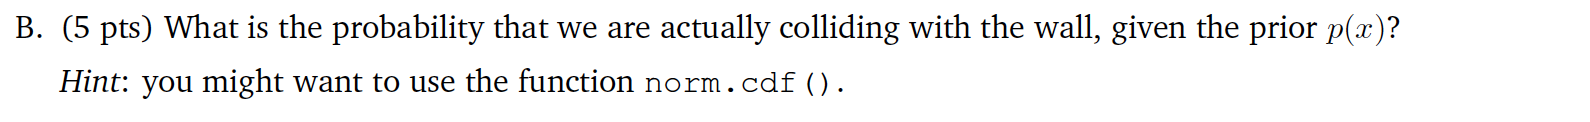

In [4]:
cd_x = norm.cdf(x,mu,sigma)

cd_x[0]

0.15865525393145707

Robot is colliding with a wall when distance between them is sero. CDF for every x shows probability that X will take a value less than or equal to x. So in our case probability is cd_x[0], which is ~ 0.16

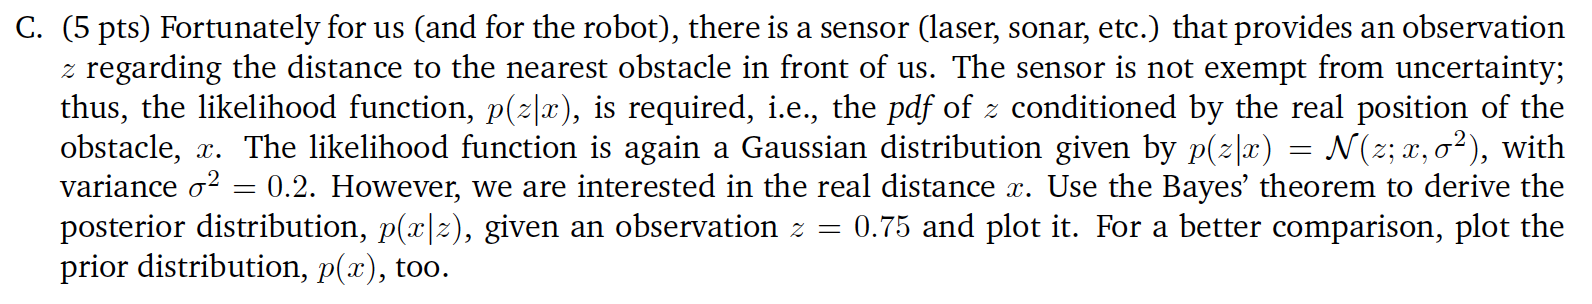

We can calculate the posterior distribution of our parameters using prior beliefs updated with likelihood

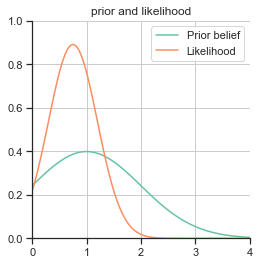

In [5]:
# p(z|x) = N(z; x, var) - likelihood - conditioned by the real position of the obstacle
# p(x|z) = p(z|x) * p(x) / p(z) - posterior

var_z = 0.2
z = 0.75
sigma_z = np.sqrt(var_z)
likelihood = norm.pdf(x, z, sigma_z)

fig, ax = plt.subplots()
ax.plot(x, prior, label='Prior belief')
ax.plot(x, likelihood, label='Likelihood')
ax.set_title('prior and likelihood')
ax.set(xlim=[0, 4], ylim=[0, 1], aspect=4) # , adjustable='datalim')
plt.legend()
plt.grid()
sns.despine()

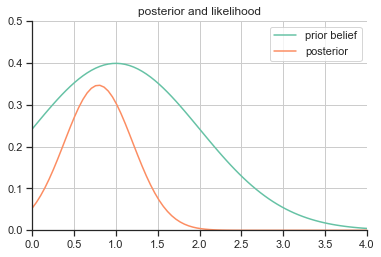

In [6]:
posterior = likelihood*prior
# 0.15 ?

fig, ax = plt.subplots()
ax.plot(x, prior, label='prior belief')
ax.plot(x, posterior, label='posterior')
ax.set_title('posterior and likelihood')
ax.set(xlim=[0, 4], ylim=[0, 0.5], aspect=5) # , adjustable='datalim')
plt.legend()
plt.grid()
sns.despine()

In [7]:
print('expected value of posterior distance is', x[np.argmax(posterior)])

expected value of posterior distance is 0.8080808080808081


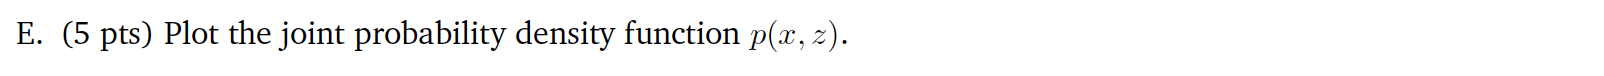

## 3d graphic

In [8]:
joint_prob = np.outer(likelihood, prior)

data = [
    go.Surface(
        z=joint_prob,
        x=x,
        y=x
    )
]
layout = go.Layout(
    title='Joint probability',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

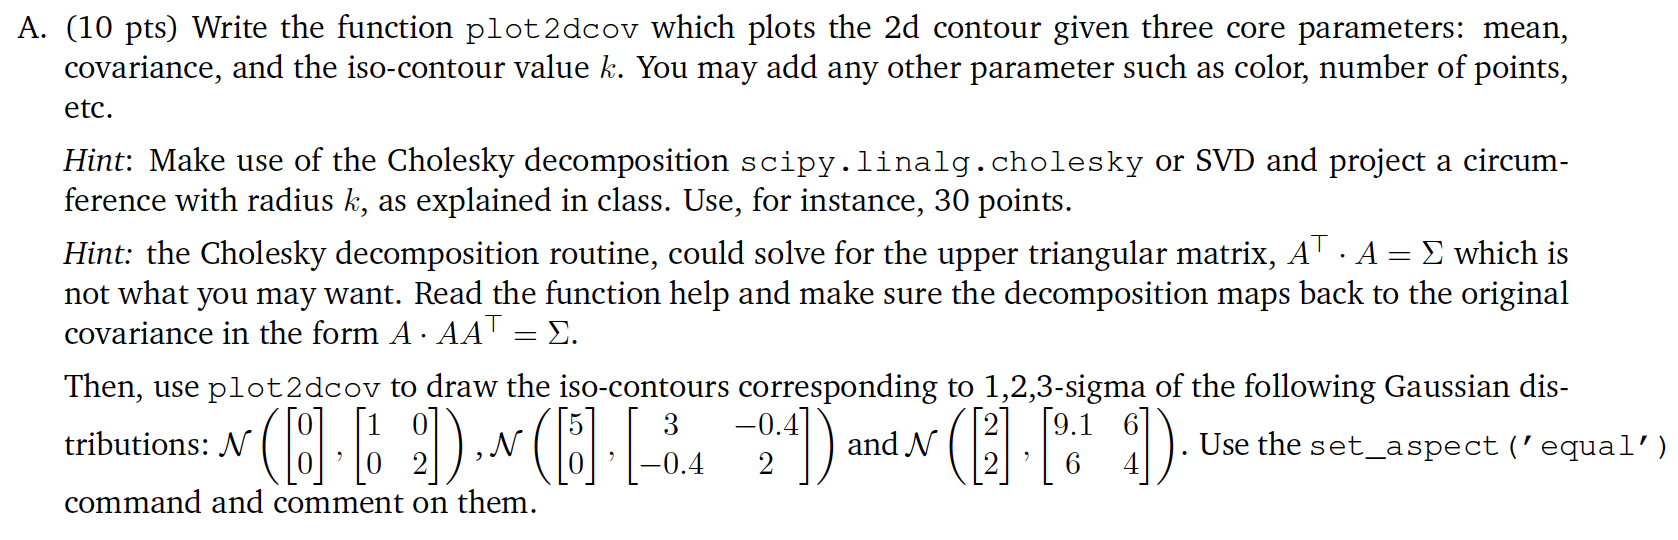

In [9]:
# def plot2dcov(mean, cov, k, points = 30):
#     mean = np.array(mean)
#     cov = np.array(cov)
    
#     path = np.linspace(0, 2*np.pi, points)
#     coords = np.array([np.cos(path), np.sin(path)]) # 2x100
#     L = cholesky(cov, lower=True) # bottom
#     ellipse = mean + k*np.dot(L, coords).T
#     #ellipse = np.stack((ellipse[0], ellipse[1]), axis=-1) # 100x2

#     return ellipse[:, 0], ellipse[:, 1]

In [10]:
def plot2dcov(mean, cov, k, dt = 0.5, points = 30):
    mean = np.array(mean)
    cov = np.array(cov)
    
    path = np.linspace(0, 2*np.pi, points)
    coords = np.array([np.cos(path), np.sin(path)]) # 2x100
    L = cholesky(cov, lower=True) # bottom
    ellipse = mean + k*np.dot(L, coords).T
    #ellipse = np.stack((ellipse[0], ellipse[1]), axis=-1) # 100x2
    ax.set_aspect('equal')
    ax.plot(ellipse[:, 0], ellipse[:, 1], label="position at %.1f" % (i * dt))

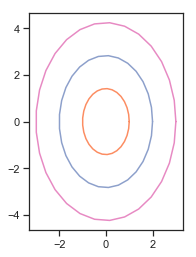

In [11]:
mean1 = np.array([0,0])
cov1 = np.array([[1,0],[0,2]])

fig, ax = plt.subplots()

for i in range(4):
    plot2dcov(mean1, cov1, i)

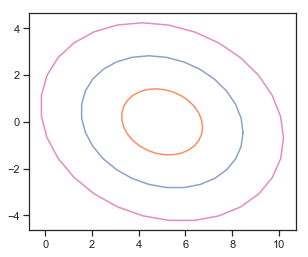

In [12]:
mean2 = np.array([5,0])
cov2 = np.array([[3,-0.4],[-0.4,2]])

fig, ax = plt.subplots()

for i in range(4):
    plot2dcov(mean2, cov2, i)

2


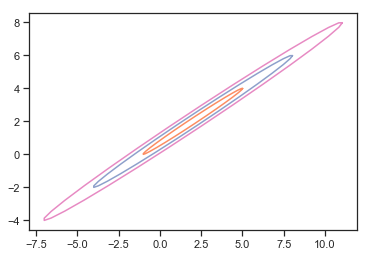

In [13]:
mean3 = np.array([2,2])
cov3 = np.array([[9.1, 6],[6, 4]])

print(LA.matrix_rank(cov3))
#print(LA.eig(cov3))

fig, ax = plt.subplots()

for i in range(4):
    plot2dcov(mean3, cov3, i)

I'll just leave it here

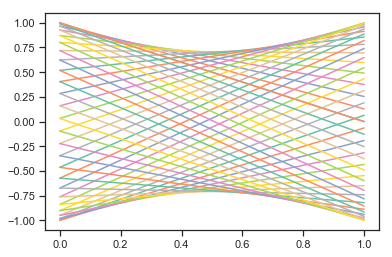

In [14]:
U = np.array([[1, 0],[0, 1]])

p = np.linspace(0, 2*np.pi, 50)
c = np.array([np.cos(p), np.sin(p)])
par = U.dot(c)
plt.plot(par)
ax.set_aspect('equal')

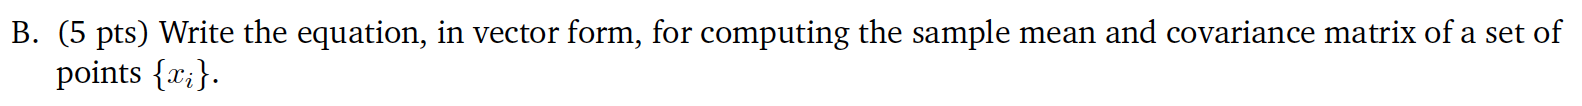

In [15]:
def mymean(x):
    return np.sum(x)/len(x)

x = np.arange(4)
print(mymean(x))

1.5


In [16]:
def mycov(x):
    return np.dot(x.T - x.mean(), x - x.mean()) / (x.shape[0]-1)

x = np.arange(4).reshape([2,2])
#mycov(x)
print(x)
print(mycov(x))

[[0 1]
 [2 3]]
[[2.5 1.5]
 [1.5 2.5]]


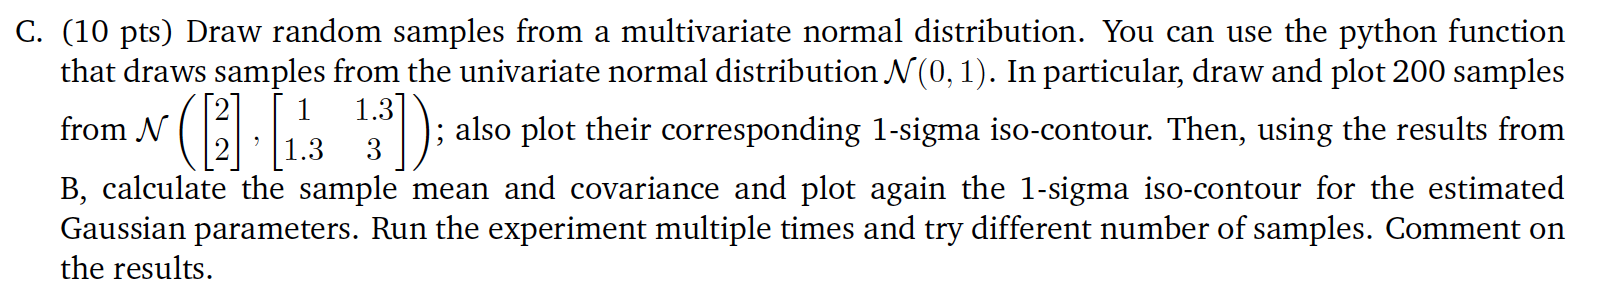

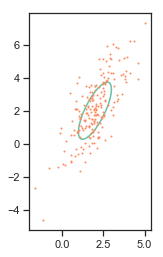

In [23]:
mean_2c = np.array([2, 2])
cov_2c = np.array([[1, 1.3],[1.3, 3]])

x, y = np.random.multivariate_normal(mean_2c, cov_2c, 200).T

fig, ax = plt.subplots()
plot2dcov(mean_2c, cov_2c, 1)

ax.plot(x, y, 'o', markersize = 1)

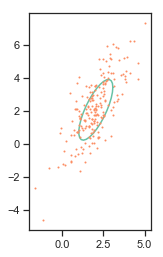

In [25]:
mean2c_my = np.mean([x, y])
cov2c_my = np.cov(x, y)

fig, ax = plt.subplots()
plot2dcov(mean2c_my, cov2c_my, 1)

ax.plot(x, y, 'o', markersize = 1)

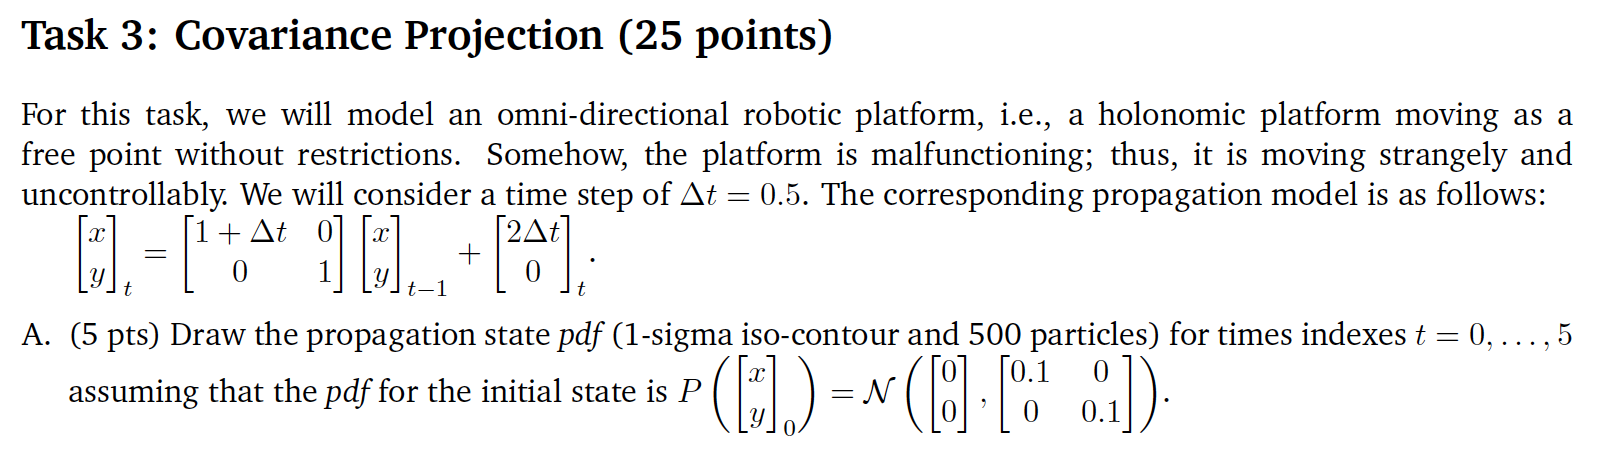

S0 знаем, можем перемещать либо 500 точек, либо только значение их ковариации и среднего

x ~ N(mu_x, cov_x)

y = Ax + B

mu_y = A*mu_x + B

cov_y = A dot cov_x dot A.T

In [27]:
# allocate space
# t = np.arange(0, 3, 0.5)
# print(len(t))
steps = 6
means = np.zeros([steps, 2])
covs = np.zeros([steps, 2, 2])
Ls = np.zeros([steps, 2, 2])

# values for starting point
means[0] = np.array([0,0])
covs[0] = np.array([[0.1, 0],[0, 0.1]])

def propagation(mean_s, cov_s, dt = 0.5):
    
    A = np.array([[1+dt,0],[0,1]])
    B = np.array([2*dt, 0])
    L = cholesky(cov_s, lower=True) # up
    
    mean_s = np.dot(A, mean_s.T) + B.T
    cov_s = np.dot(A, np.dot(cov_s, A.T))
    
    return mean_s, cov_s

for i in range(1, steps):
    means[i], covs[i] = propagation(means[i-1], covs[i-1], dt = 0.5)

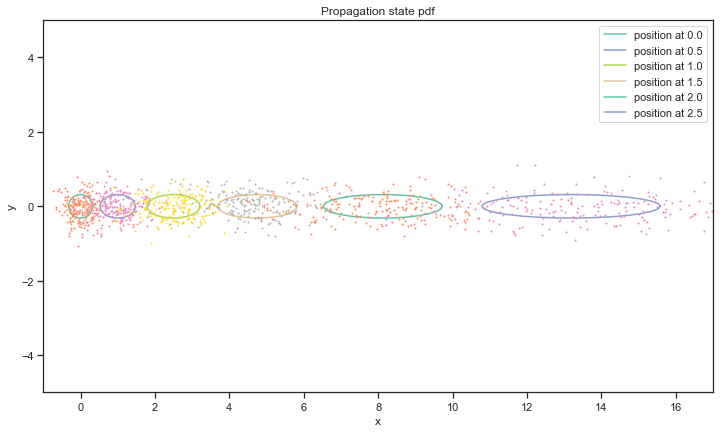

In [28]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(12,9)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-5, 5)
ax.set_xlim(-1, 17)
ax.set_title("Propagation state pdf")
for i in range(len(covs)):
    plot2dcov(means[i], covs[i], 1)
    x, y = np.random.multivariate_normal(means[i], covs[i], 200).T
    plt.plot(x, y, 'o', markersize=1)
plt.legend()
plt.show()

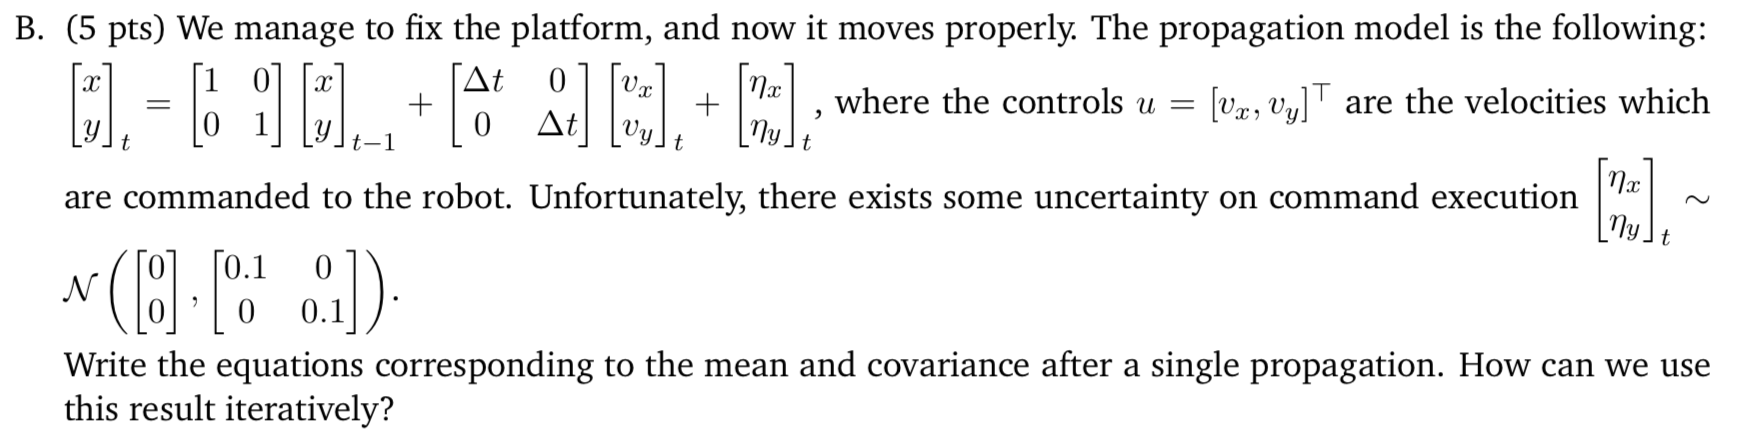

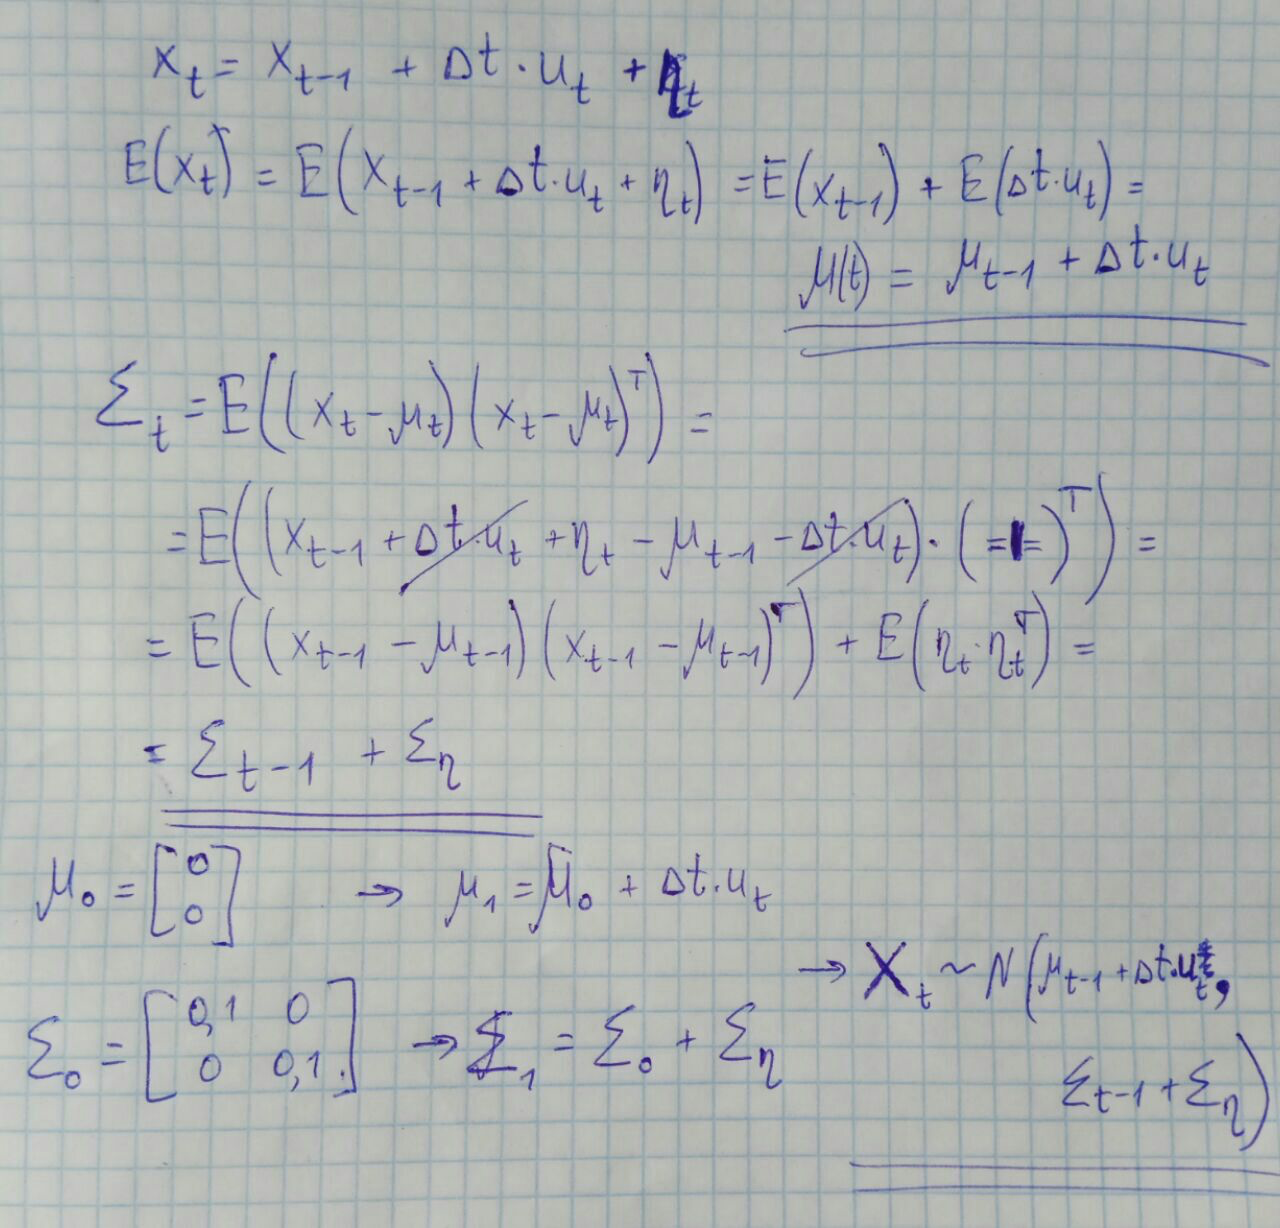

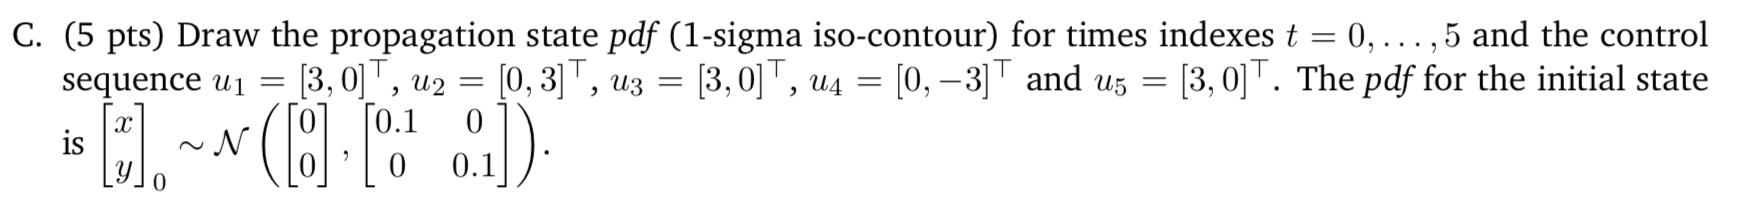

In [29]:
control = np.array([
    [3, 0],
    [0, 3],
    [3, 0],
    [0, -3],
    [3, 0]
])

# noise
mean_n = np.array([0,0])
cov_n = np.array([[0.1, 0],[0, 0.1]])

steps = 6

means = np.zeros([steps, 2])
covs = np.zeros([steps, 2, 2])

# values for starting point
means[0] = [0,0]
covs[0] = [[0.1, 0], [0, 0.1]]

def propagation_fixed(mean_s, control, cov_s, cov_n, mean_n, dt = 0.5):
    
    mean_s = (mean_s.T + np.dot([[dt, 0], [0, dt]], control)).T + mean_n
    cov_s = cov_s + cov_n
    
    return mean_s, cov_s

for i in range(1, steps):
    means[i], covs[i] = propagation_fixed(means[i-1], control[i-1], covs[i-1], cov_n, mean_n, dt = 0.5)


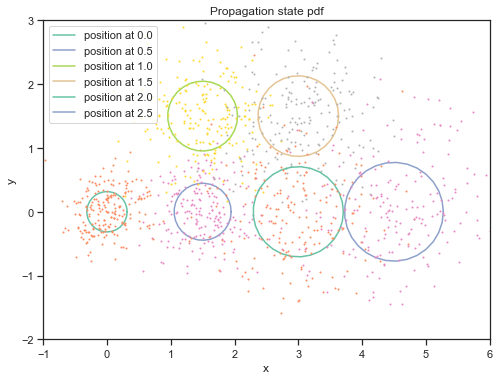

In [30]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(8,8)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-2, 3)
ax.set_xlim(-1, 6)
ax.set_title("Propagation state pdf")
for i in range(len(covs)):
    plot2dcov(means[i], covs[i], 1)
    x, y = np.random.multivariate_normal(means[i], covs[i], 200).T
    plt.plot(x, y, 'o', markersize=1)
plt.legend()
plt.show()

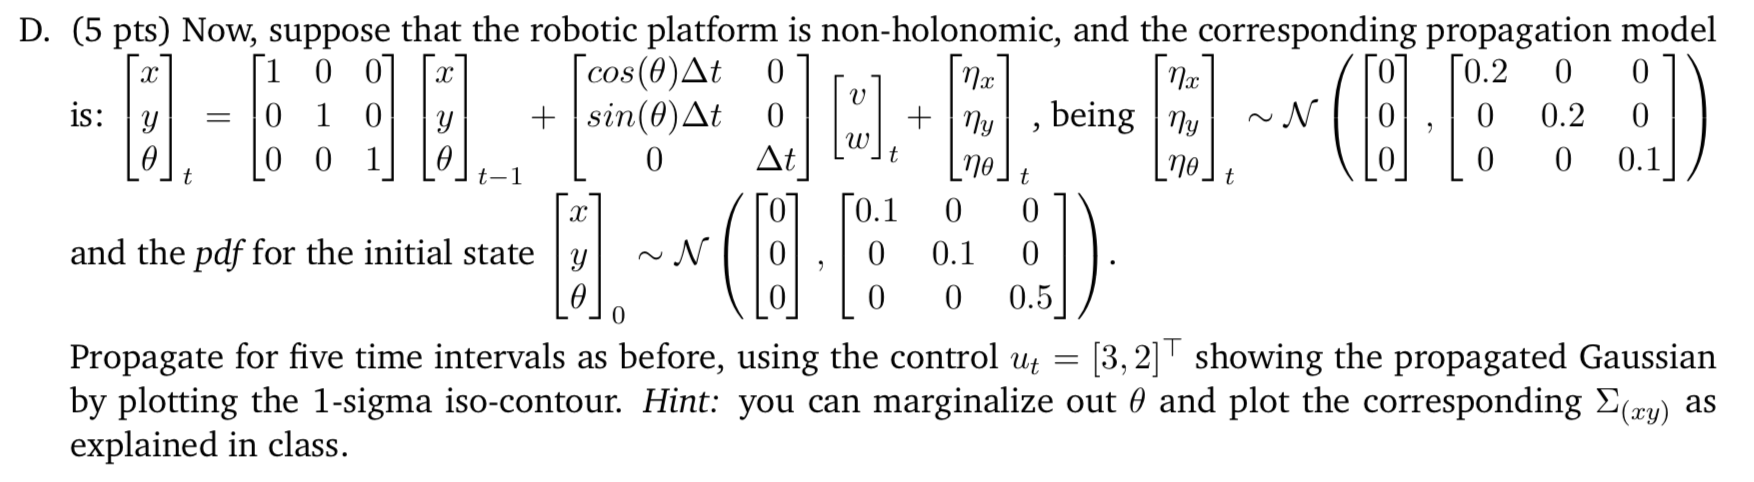

In [39]:
steps = 6
means = np.zeros([steps, 3])
covs = np.zeros([steps, 3, 3])

means[0] = np.array([0,0,0])
covs[0] = np.array([[0.1, 0, 0], 
                    [0, 0.1, 0], 
                    [0, 0, 0.5]])

mean_n = np.array([0,0,0])
cov_n = np.array([[0.2, 0, 0], 
                  [0, 0.2, 0], 
                  [0, 0, 0.1]])

control = np.array([3, 2])

In [52]:
def Vj(state, dt = 0.5):
    V = np.array([[dt*np.cos(state[2]), 0], 
                  [dt*np.sin(state[2]), 0], 
                  [0, dt]])
    return V


def Gj(state, control, dt = 0.5):
    G = np.array([
                [1, 0, -np.sin(state[2]) * dt * control[0]], 
                [0, 1, np.cos(state[2]) * dt * control[0]], 
                [0, 0, 1]])
    return G

In [42]:
def propagation_nonhol(mean_s, control, cov_s, cov_n, mean_n, dt = 0.5):
    
    cov_s = np.dot(Gj(mean_s, control), np.dot(cov_s, Gj(mean_s, control).T)) + cov_n
    mean_s = (mean_s.T + Vj(mean_s).dot(control.T)).T # + mean_n
    
    return mean_s, cov_s

for i in range(1, steps):
    means[i], covs[i] = propagation_nonhol(means[i-1], control, covs[i-1], cov_n, mean_n, dt = 0.5)

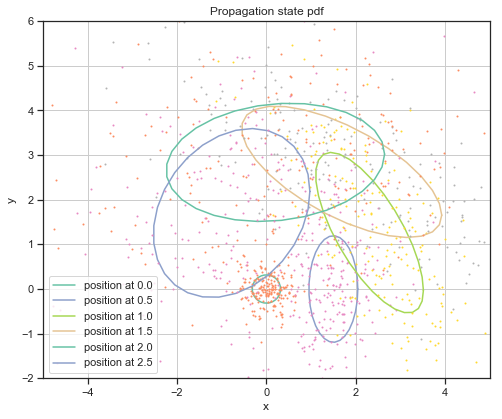

In [43]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-2, 6)
ax.set_xlim(-5, 5)
ax.set_title("Propagation state pdf")

for i in range(len(covs)):
    plot2dcov(means[i][:2], covs[i][:2, :2], 1)
    x, y = np.random.multivariate_normal(means[i][:2], covs[i][:2, :2], 200).T
    plt.plot(x, y, 'o', markersize=1)
    
plt.legend()
plt.show()

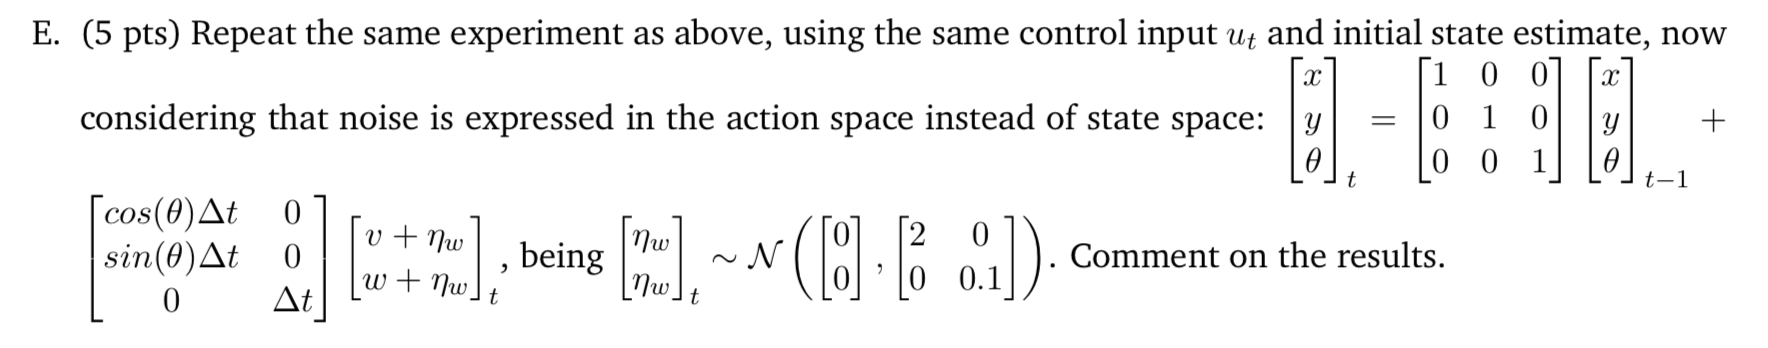

In [53]:
mean_n_action = np.array([0, 0])
cov_n_action = np.array([[2, 0], [0, 0.1]])

means = np.zeros([steps, 3])
covs = np.zeros([steps, 3, 3])

covs[0] = np.array([[0.1, 0, 0], 
                    [0, 0.1, 0], 
                    [0, 0, 0.5]])

In [60]:
def propagation_nonhol(mean_s, control, cov_s, cov_n, mean_n, dt = 0.5):
    
    cov_s = (np.dot(Gj(mean_s, control), np.dot(cov_s, Gj(mean_s, control).T)) + 
            np.dot(Vj(mean_s), np.dot(cov_n, Vj(mean_s).T)))
        
    mean_s = (mean_s.T + Vj(mean_s).dot(control.T)).T
    
    return mean_s, cov_s

for i in range(1, steps):
    means[i], covs[i] = propagation_nonhol(means[i-1], control, covs[i-1], cov_n_action, mean_n_action, dt = 0.5)

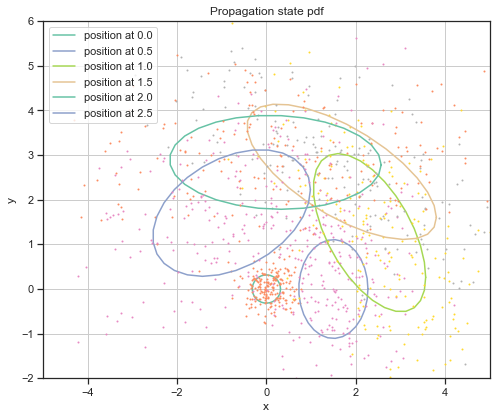

In [59]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-2, 6)
ax.set_xlim(-5, 5)
ax.set_title("Propagation state pdf")

for i in range(len(covs)):
    plot2dcov(means[i][:2], covs[i][:2, :2], 1)
    x, y = np.random.multivariate_normal(means[i][:2], covs[i][:2, :2], 200).T
    plt.plot(x, y, 'o', markersize=1)
    
plt.legend()
plt.show()

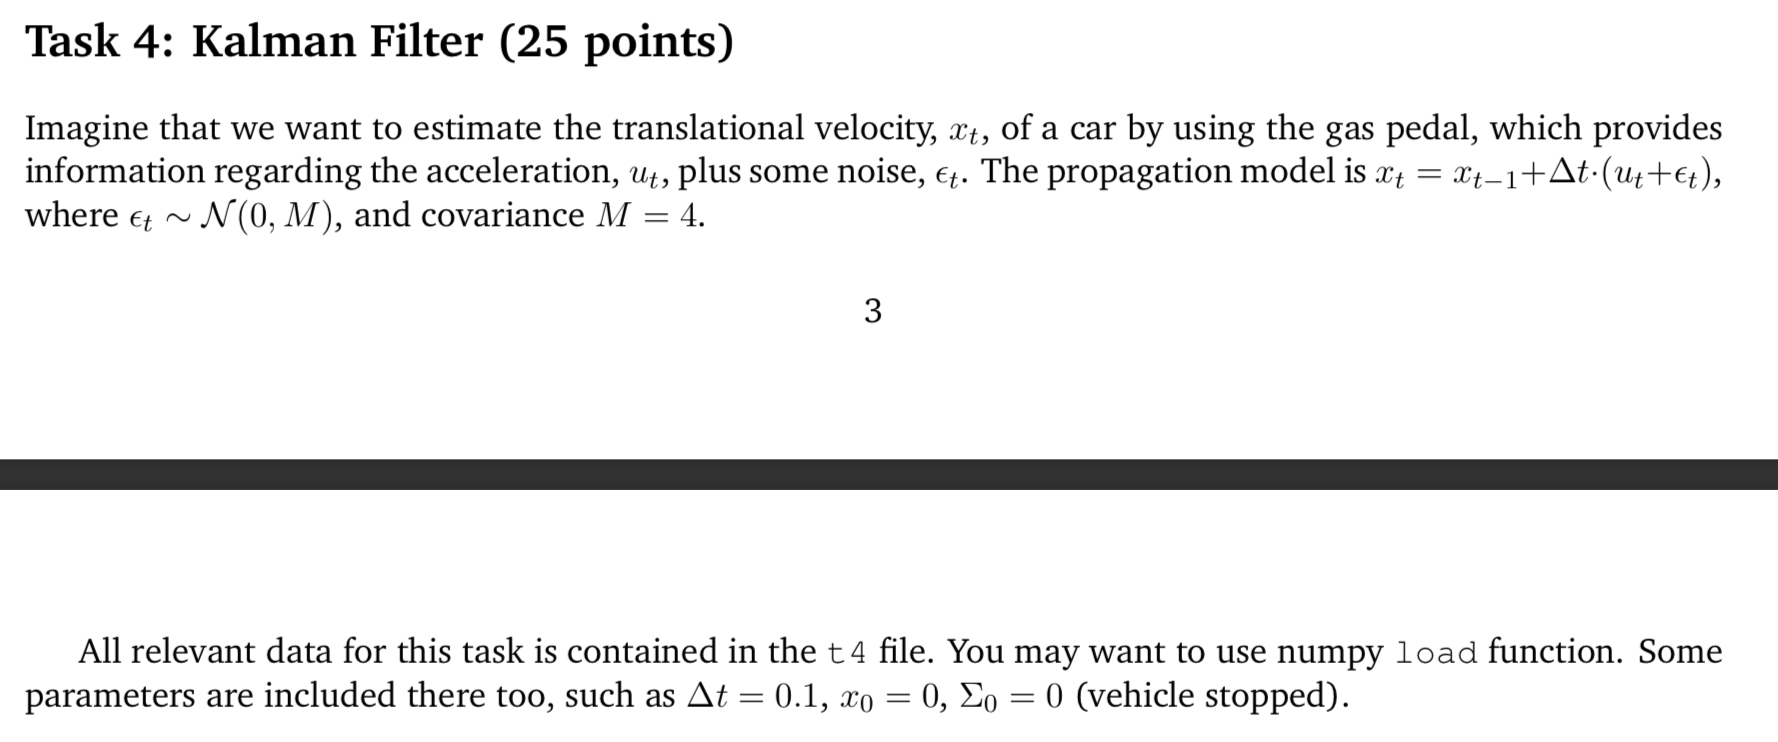

In [62]:
data = np.load("/Users/nickzherdev/Desktop/Perception/ps1/t4")

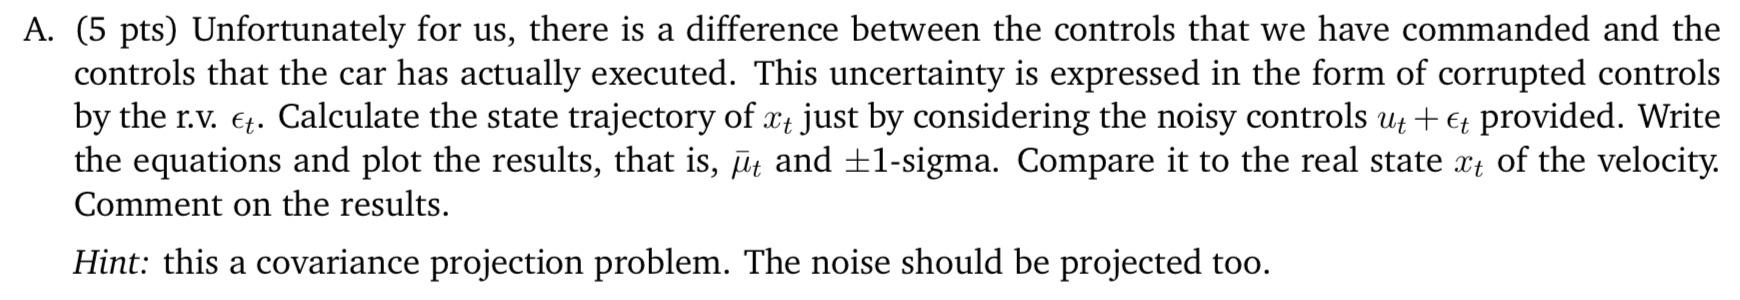

In [91]:
data.files

['P_0', 'x_0', 'u', 'Q', 'z', 'x_real', 't', 'dt', 'R_action', 'N']

In [115]:
u = data['u']
x_real = data['x_real']

In [126]:
x = [0] # x0
cov_car = [0] # cov0
steps = u.shape[0]
dt = 0.1
cov_n = 4

def propagate(x, u, dt = 0.1, cov_n = 4):
    return x + dt*(u + np.random.normal(0, cov_n))

for i in range(steps):
    x.append(propagate(x[i], u[i]))
    cov_car.append(cov_car[i-1] + cov_n*(dt**2))
    
x = np.array(x)
cov_car = np.array(cov_car)

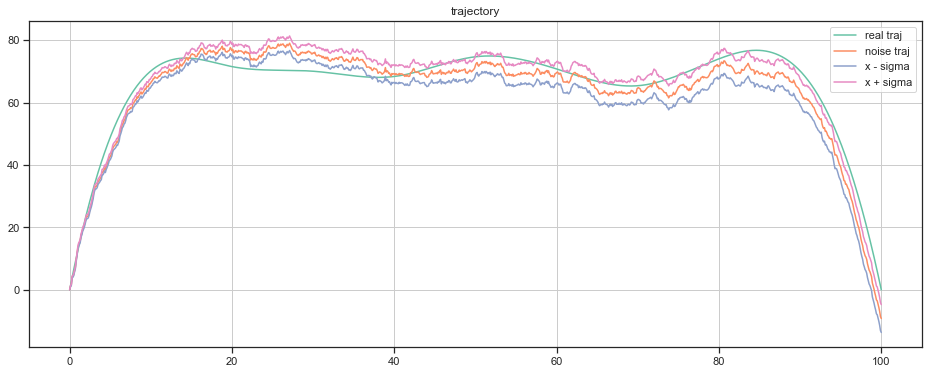

In [128]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(True)
ax.set_xlabel="time"
ax.set_ylabel="x"
ax.set_title("trajectory")

t = np.linspace(0, dt * u.shape[0], u.shape[0]+1)

ax.plot(t, x_real, label="real traj")
ax.plot(t, x, label="noise traj")
ax.plot(t, x - np.sqrt(cov_car), label="x - sigma")
ax.plot(t, x + np.sqrt(cov_car), label="x + sigma")

plt.legend()
plt.show()

Just as expected here we see poor trajectory following due to noise.

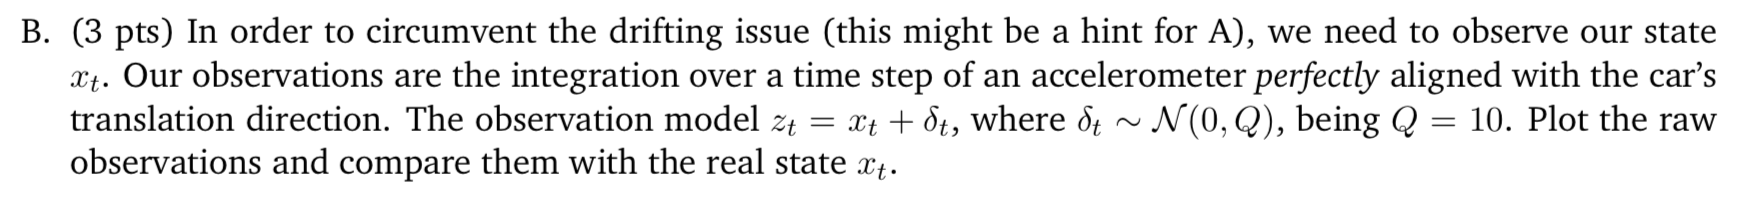

In [146]:
z = data['z']

1000


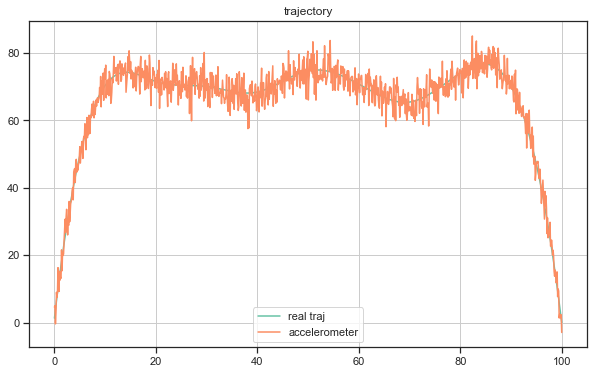

In [147]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.grid(True)
ax.set_xlabel="time"
ax.set_ylabel="x"
ax.set_title("trajectory")

t = np.linspace(0, dt * u.shape[0], u.shape[0])
print(len(t))
ax.plot(t, x_real[1:], label="real traj")
ax.plot(t, z, label="accelerometer")

plt.legend()
plt.show()

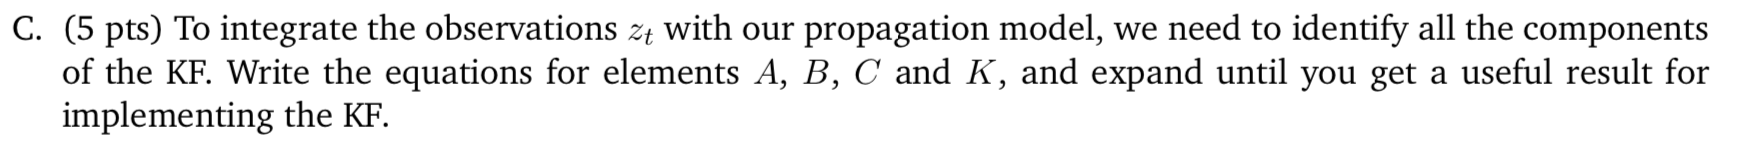

In [168]:
A = 1
B = dt
C = 1
Q = 10
R = 4*(dt**2)

x = [0]
E = [0]

for i in range(u.shape[0]):
    x1 = x[-1] + dt*u[i]
    E_ = A*E[-1]*A + R
    K = E_*C / (C*E_*C + Q)
    x.append(x1 + K*(z[i] - C*x[-1]))
    E.append((1 - K*C)*E_)
    
x = np.array(x)
E = np.array(E)

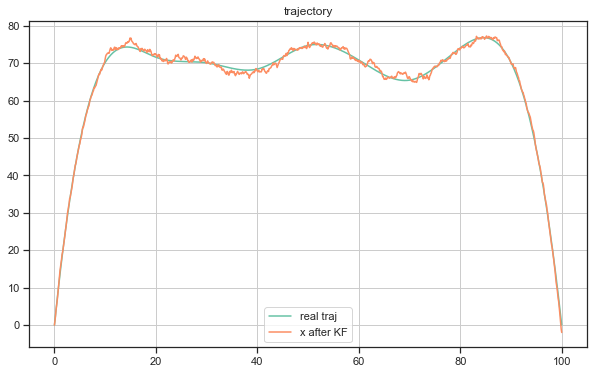

In [174]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.grid(True)
ax.set_xlabel="time"
ax.set_ylabel="x"
ax.set_title("trajectory")

t = np.linspace(0, dt * u.shape[0], u.shape[0]+1)
ax.plot(t, x_real, label="real traj")
ax.plot(t, x, label="x after KF")

plt.legend()
plt.show()

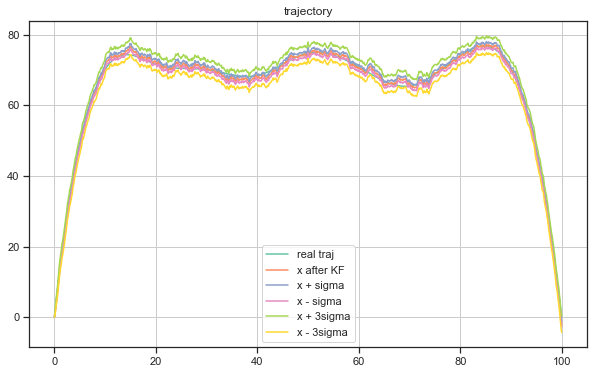

In [173]:
fig, ax = plt.subplots(1, 1)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.grid(True)
ax.set_xlabel="time"
ax.set_ylabel="x"
ax.set_title("trajectory")

t = np.linspace(0, dt * u.shape[0], u.shape[0]+1)
ax.plot(t, x_real, label="real traj")
ax.plot(t, x, label="x after KF")
ax.plot(t, x + np.sqrt(E), label="x + sigma")
ax.plot(t, x - np.sqrt(E), label="x - sigma")
ax.plot(t, x + 3 * np.sqrt(E), label="x + 3sigma")
ax.plot(t, x - 3 * np.sqrt(E), label="x - 3sigma")

plt.legend()
plt.show()

After Kalman filtration noise is reduced significantly and accurace of estimation is high.